In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
start_date = '2019-01-01'
end_date = '2022-01-01'
data = yf.download('AAPL', start=start_date,end=end_date, progress=False)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,38.168350,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,34.366497,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,35.833588,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,35.753819,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,36.435402,164101200


In [4]:
aapl_data = pd.DataFrame(index=data.index)

In [5]:
aapl_data.head()

""
Date
2019-01-02
2019-01-03
2019-01-04
2019-01-07
2019-01-08


In [6]:
aapl_data['Price'] = data['Adj Close']
aapl_data['Difference'] = aapl_data['Price'].diff()

In [7]:
aapl_data.head()

,Price,Difference
Date,,
2019-01-02,38.168350,NaN
2019-01-03,34.366497,-3.801853
2019-01-04,35.833588,1.467091
2019-01-07,35.753819,-0.079769
2019-01-08,36.435402,0.681583


In [8]:
# We want to buy when the price is lower than the previous day and sell when higher than previous day
# A negative value indicates a buy and position is sell. 0 is a buy and 1 is a sell
aapl_data.dropna(inplace=True)
aapl_data['Signal'] = np.where(aapl_data['Difference'] > 0, 1, 0)

In [9]:
aapl_data.head()

,Price,Difference,Signal
Date,,,
2019-01-03,34.366497,-3.801853,0
2019-01-04,35.833588,1.467091,1
2019-01-07,35.753819,-0.079769,0
2019-01-08,36.435402,0.681583,1
2019-01-09,37.054134,0.618732,1


In [10]:
# We don't want to constantly buy one share when the price go up or sell one share when the price go down
# We will limit so that when price continue to increase, we keep our position until the price drop, then we sell
aapl_data['Positions'] = aapl_data['Signal'].diff()

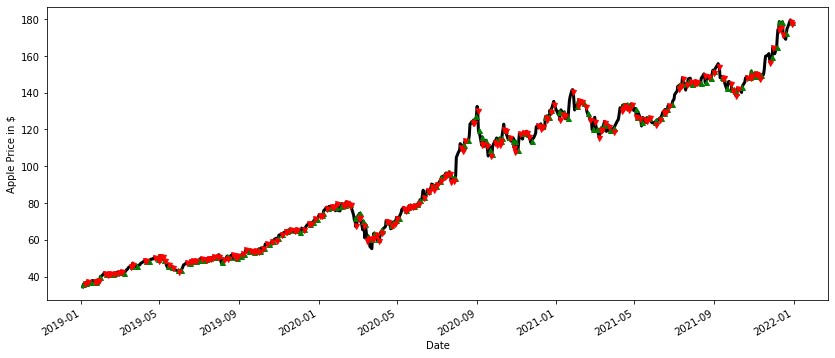

In [11]:
# Here is a graph to help us visualize
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111, ylabel='Apple Price in $')
aapl_data['Price'].plot(ax=ax1, color='k', lw=3.)

# Buy plot(x value is the date, y value is the position)
ax1.plot(aapl_data.loc[aapl_data.Positions== 1.0].index,
         aapl_data.Price[aapl_data.Positions == 1.0],
         '^', markersize=5, color='g')

# Sell
ax1.plot(aapl_data.loc[aapl_data.Positions == -1.0].index,
         aapl_data.Price[aapl_data.Positions == -1.0],
         'v', markersize=5, color='r')

plt.show()

In [12]:
# We want to see how much we earn using this strategy, excluding commission fee
# We allocation the initial investment to be 1000
initial_capital = 1000
aapl_data['EOD'] = (aapl_data['Signal'].multiply(aapl_data['Price'], axis=0))

In [13]:
aapl_data.head()

,Price,Difference,Signal,Positions,EOD
Date,,,,,
2019-01-03,34.366497,-3.801853,0,NaN,0.000000
2019-01-04,35.833588,1.467091,1,1.0,35.833588
2019-01-07,35.753819,-0.079769,0,-1.0,0.000000
2019-01-08,36.435402,0.681583,1,1.0,36.435402
2019-01-09,37.054134,0.618732,1,0.0,37.054134


In [17]:
aapl_data['Cash'] = initial_capital - (aapl_data['Signal'].diff().multiply(aapl_data['Price'], axis=0)).cumsum()

In [18]:
aapl_data.head(10)

,Price,Difference,Signal,Positions,EOD,Cash
Date,,,,,,
2019-01-03,34.366497,-3.801853,0,NaN,0.000000,NaN
2019-01-04,35.833588,1.467091,1,1.0,35.833588,964.166412
2019-01-07,35.753819,-0.079769,0,-1.0,0.000000,999.920231
2019-01-08,36.435402,0.681583,1,1.0,36.435402,963.484829
2019-01-09,37.054134,0.618732,1,0.0,37.054134,963.484829
2019-01-10,37.172569,0.118435,1,0.0,37.172569,963.484829
2019-01-11,36.807610,-0.364960,0,-1.0,0.000000,1000.292439
2019-01-14,36.254128,-0.553482,0,0.0,0.000000,1000.292439
2019-01-15,36.996132,0.742004,1,1.0,36.996132,963.296307


In [20]:
aapl_data['Total'] = aapl_data['EOD'] + aapl_data['Cash']

In [21]:
aapl_data.head(10)

,Price,Difference,Signal,Positions,EOD,Cash,Total
Date,,,,,,,
2019-01-03,34.366497,-3.801853,0,NaN,0.000000,NaN,NaN
2019-01-04,35.833588,1.467091,1,1.0,35.833588,964.166412,1000.000000
2019-01-07,35.753819,-0.079769,0,-1.0,0.000000,999.920231,999.920231
2019-01-08,36.435402,0.681583,1,1.0,36.435402,963.484829,999.920231
2019-01-09,37.054134,0.618732,1,0.0,37.054134,963.484829,1000.538963
2019-01-10,37.172569,0.118435,1,0.0,37.172569,963.484829,1000.657398
2019-01-11,36.807610,-0.364960,0,-1.0,0.000000,1000.292439,1000.292439
2019-01-14,36.254128,-0.553482,0,0.0,0.000000,1000.292439,1000.292439
2019-01-15,36.996132,0.742004,1,1.0,36.996132,963.296307,1000.292439


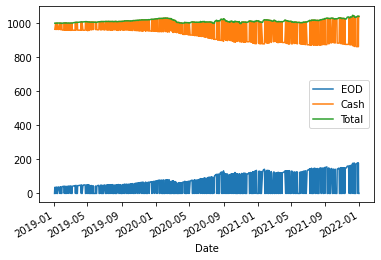

In [22]:
aapl_data[['EOD','Cash','Total']].plot()
plt.show()